In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
import gzip
import numpy as np
from six.moves import urllib

In [17]:
def load_fashion_mnist():
    base_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/'
    files = [
        'train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz',
        't10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz'
    ]
    data_dir = os.path.join(os.getcwd(), 'fashion-mnist-data')
    os.makedirs(data_dir, exist_ok=True)

    for file in files:
        url = base_url + file
        file_path = os.path.join(data_dir, file)
        if not os.path.exists(file_path):
            urllib.request.urlretrieve(url, file_path)

        with gzip.open(file_path, 'rb') as f_in:
            with open(file_path.replace('.gz', ''), 'wb') as f_out:
                f_out.write(f_in.read())

    def load_images(path):
        with open(path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
        return data.reshape(-1, 28, 28)

    def load_labels(path):
        with open(path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=8)
        return data

    train_images = load_images(os.path.join(data_dir, 'train-images-idx3-ubyte'))
    train_labels = load_labels(os.path.join(data_dir, 'train-labels-idx1-ubyte'))
    test_images = load_images(os.path.join(data_dir, 't10k-images-idx3-ubyte'))
    test_labels = load_labels(os.path.join(data_dir, 't10k-labels-idx1-ubyte'))

    return (train_images, train_labels), (test_images, test_labels)

(train_images, train_labels), (test_images, test_labels) = load_fashion_mnist()

In [19]:
train_images, test_images = train_images / 255.0, test_images / 255.0

train_images.shape, test_images.shape, train_labels.shape, train_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (60000,))

In [23]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

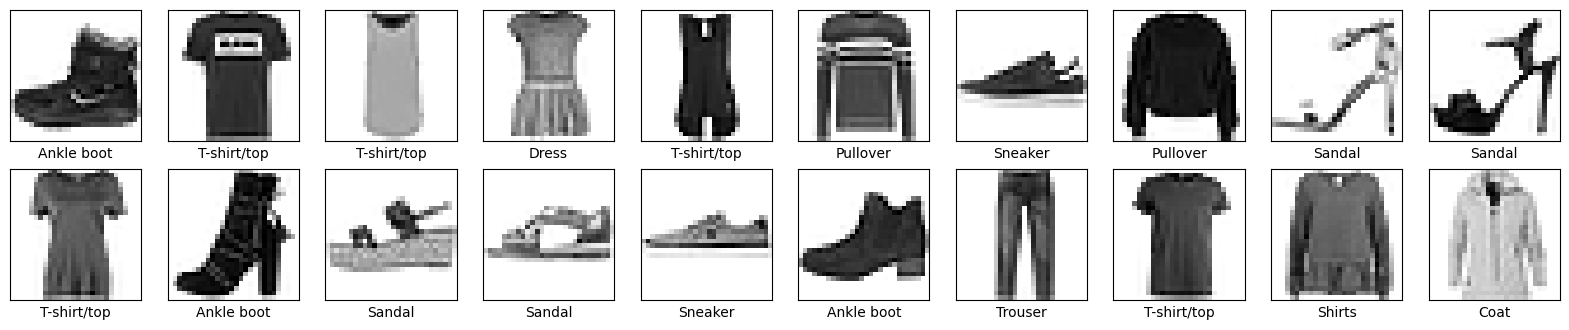

In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirts', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(20, 10))
for i in range(20):
    plt.subplot(5, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

In [33]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8185 - loss: 0.4955 - val_accuracy: 0.8610 - val_loss: 0.3793
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8814 - loss: 0.3259 - val_accuracy: 0.8744 - val_loss: 0.3437
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8973 - loss: 0.2788 - val_accuracy: 0.8876 - val_loss: 0.3006
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9093 - loss: 0.2468 - val_accuracy: 0.9009 - val_loss: 0.2739
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9165 - loss: 0.2244 - val_accuracy: 0.9046 - val_loss: 0.2757
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9234 - loss: 0.2026 - val_accuracy: 0.9057 - val_loss: 0.2809
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9314 - loss: 0.1850 - val_accuracy: 0.9050 - val_loss: 0.2749
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9358 - loss: 0

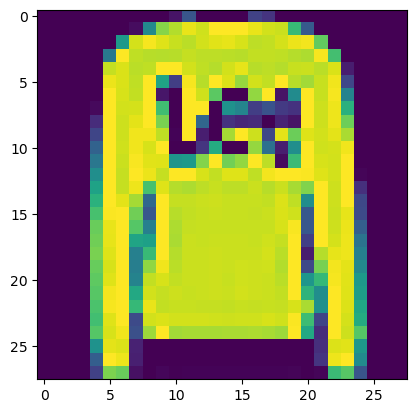

In [40]:
plt.imshow(test_images[1])

In [41]:
pre = model.predict(test_images)
print(class_names[np.argmax(pre[1])])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Pullover


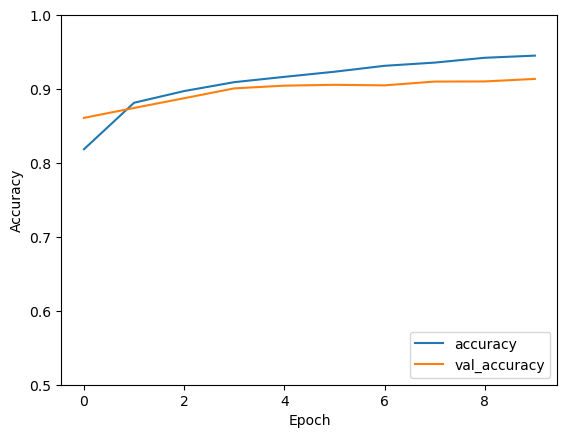

313/313 - 1s - 3ms/step - accuracy: 0.9137 - loss: 0.2641


In [45]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [47]:
print("测试准确率为: ", test_acc)

测试准确率为:  0.9136999845504761
